## Analyzing Trends in Honey Production: Insights, Predictions, and Recommendations for Sustainability

### Introduction

Honey production is a vital agricultural activity with significant environmental and economic implications. This analysis examines honey production trends over the years and predicts future production levels using linear regression. We will expand the scope by incorporating exploratory data analysis (EDA), statistical insights, and model evaluation, followed by meaningful visualizations.

### Workflow Process
1. Data Loading and Initial Exploration: Import the dataset and examine its structure.
2. Data Preprocessing: Summarize honey production by year and visualize trends.
3. Linear Regression Modeling: Fit a linear regression model to predict honey production.
4. EDA and Statistical Insights: Analyze trends, correlations, and distributions to understand the data better.
5. Model Evaluation and Predictions: Evaluate the model's performance and predict future honey production.
6. Insights and Conclusion: Summarize key findings and their implications.

##### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

##### Load the dataset

In [2]:
df = pd.read_csv("honeyproduction.csv")

In [3]:
# 1. Data Exploration
print("Dataset Overview:")
print(df.head())
print("\nDataset Information:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Dataset Overview:
  state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0    AL   16000.0           71   1136000.0    159000.0        0.72   
1    AZ   55000.0           60   3300000.0   1485000.0        0.64   
2    AR   53000.0           65   3445000.0   1688000.0        0.59   
3    CA  450000.0           83  37350000.0  12326000.0        0.62   
4    CO   27000.0           72   1944000.0   1594000.0        0.70   

    prodvalue  year  
0    818000.0  1998  
1   2112000.0  1998  
2   2033000.0  1998  
3  23157000.0  1998  
4   1361000.0  1998  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   pric

##### Grouping and Visualizing Yearly Production

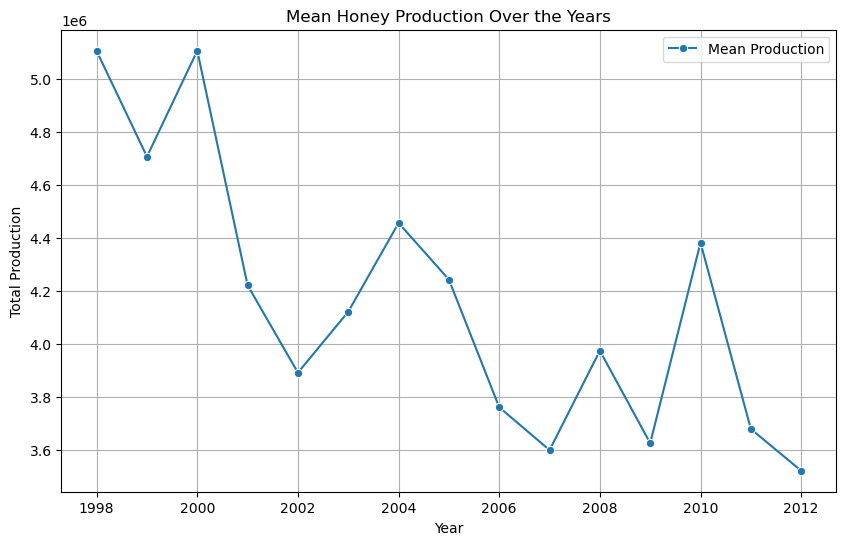

In [4]:
prod_per_year = df.groupby('year').totalprod.mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=prod_per_year, x='year', y='totalprod', marker='o', label='Mean Production')
plt.title('Mean Honey Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.grid()
plt.legend()
plt.show()

##### We can now see the Production per Colony, see the more prouductuve one and then plot all


Top States by Production per Colony:
state
HI    98.000000
LA    95.733333
ND    88.066667
MS    87.466667
FL    83.066667
WI    79.400000
MT    77.333333
SD    75.800000
MN    74.266667
AR    73.933333
Name: production_per_colony, dtype: float64


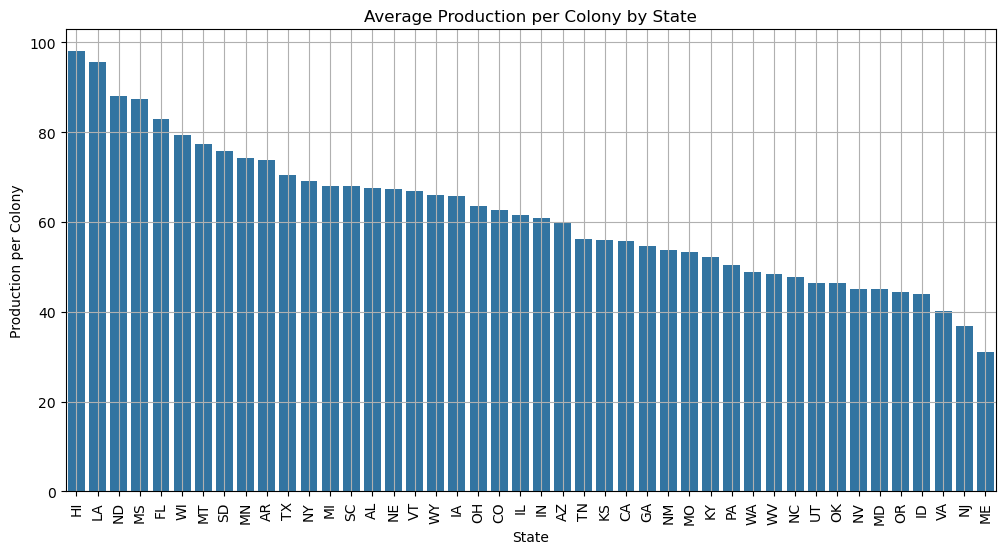

In [5]:
df['production_per_colony'] = df['totalprod'] / df['numcol']
print("\nTop States by Production per Colony:")
print(df.groupby('state')['production_per_colony'].mean().sort_values(ascending=False).head(10))

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='state', y='production_per_colony', errorbar=None, order=df.groupby('state')['production_per_colony'].mean().sort_values(ascending=False).index)
plt.title('Average Production per Colony by State')
plt.xlabel('State')
plt.ylabel('Production per Colony')
plt.xticks(rotation=90)
plt.grid()
plt.show()

##### Year-on-Year Percentage Change


Year-on-Year Percentage Change:
    year  pct_change
0   1998         NaN
1   1999   -7.804336
2   2000    8.484241
3   2001  -17.321867
4   2002   -7.797123
5   2003    5.901381
6   2004    8.120005
7   2005   -4.793985
8   2006  -11.341676
9   2007   -4.290123
10  2008   10.398927
11  2009   -8.760585
12  2010   20.835746
13  2011  -16.026219
14  2012   -4.275786


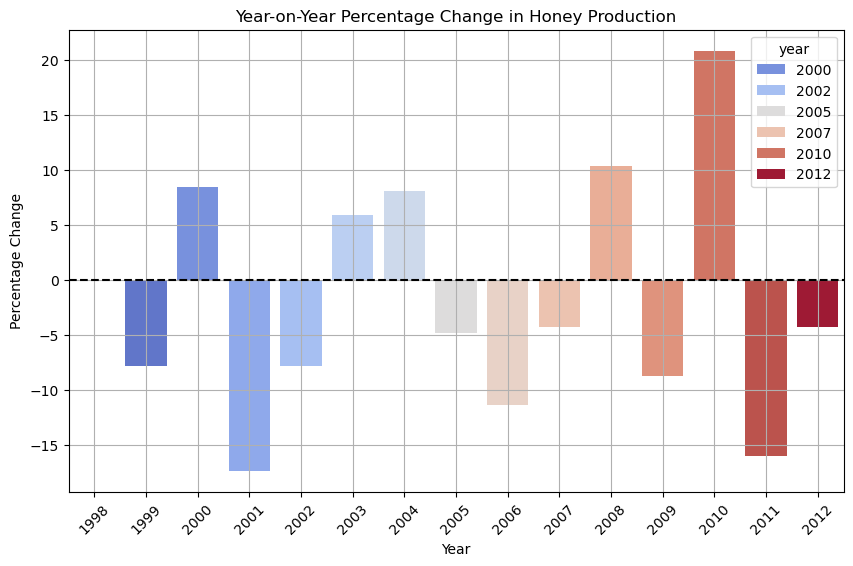

In [6]:
prod_per_year['pct_change'] = prod_per_year['totalprod'].pct_change() * 100
print("\nYear-on-Year Percentage Change:")
print(prod_per_year[['year', 'pct_change']])

plt.figure(figsize=(10, 6))
sns.barplot(data=prod_per_year, x='year', y='pct_change', palette='coolwarm', hue='year')
plt.axhline(0, color='black', linestyle='--')
plt.title('Year-on-Year Percentage Change in Honey Production')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.xticks(rotation=45)
plt.grid()
plt.show()

##### Correlation Analysis


Correlation Matrix:
                         numcol  yieldpercol  totalprod  production_per_colony
numcol                 1.000000     0.243515   0.953594               0.243515
yieldpercol            0.243515     1.000000   0.396252               1.000000
totalprod              0.953594     0.396252   1.000000               0.396252
production_per_colony  0.243515     1.000000   0.396252               1.000000


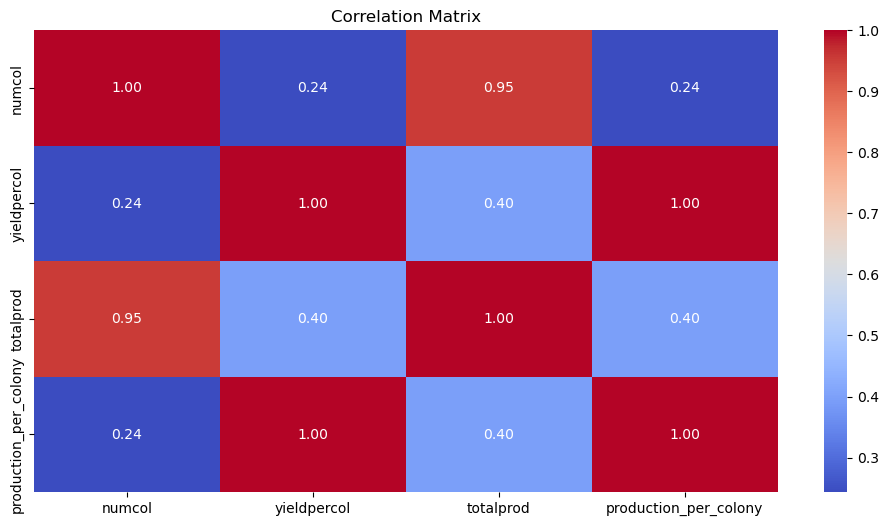

In [7]:
corr_matrix = df[['numcol', 'yieldpercol', 'totalprod', 'production_per_colony']].corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

##### State-Wise Trends Over Time

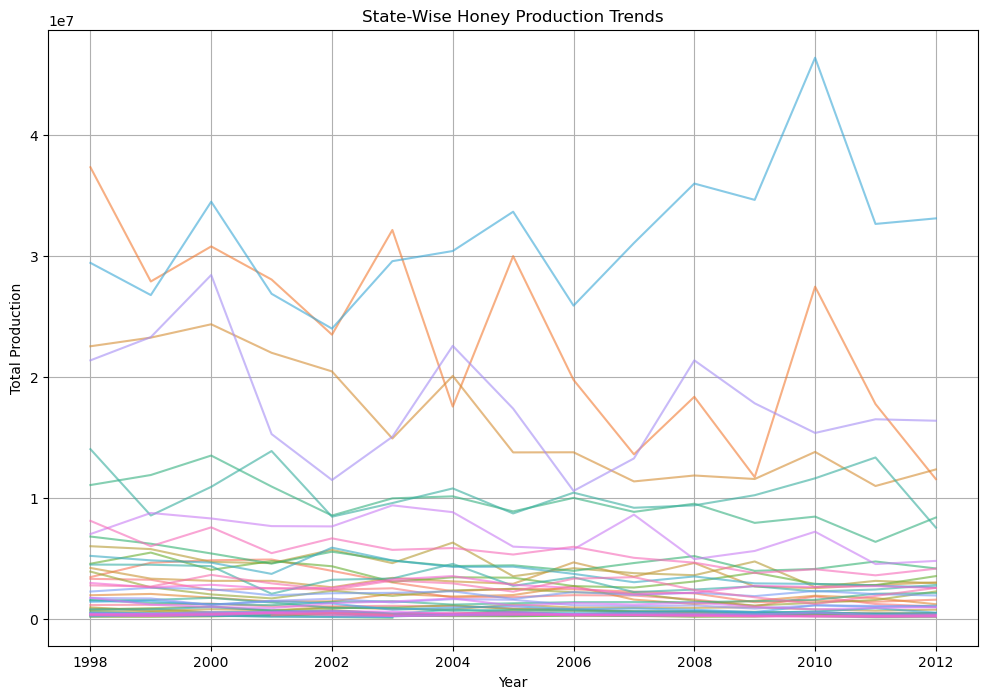

In [8]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='year', y='totalprod', hue='state', alpha=0.6, legend=False)
plt.title('State-Wise Honey Production Trends')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.grid()
plt.show()

#### Linear Regression and Predictions

In [9]:
X = prod_per_year['year'].values.reshape(-1, 1)
y = prod_per_year['totalprod']

- Build the model

In [10]:
model = LinearRegression()
model.fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_
print(f"Model Coefficients: Slope = {slope}, Intercept = {intercept}")

Model Coefficients: Slope = -88303.18915238194, Intercept = 181208083.1073298


- Model Predictions

In [11]:
y_predict = model.predict(X)
print(f"The Y predict results are the follows:{y_predict}")

The Y predict results are the follows:[4778311.18087068 4690007.99171829 4601704.8025659  4513401.61341354
 4425098.42426115 4336795.23510876 4248492.04595637 4160188.85680401
 4071885.66765162 3983582.47849923 3895279.28934684 3806976.10019448
 3718672.91104209 3630369.7218897  3542066.53273734]


- Now, we plot Actual vs Predicted Values using the Regression Line and the Model we calculate

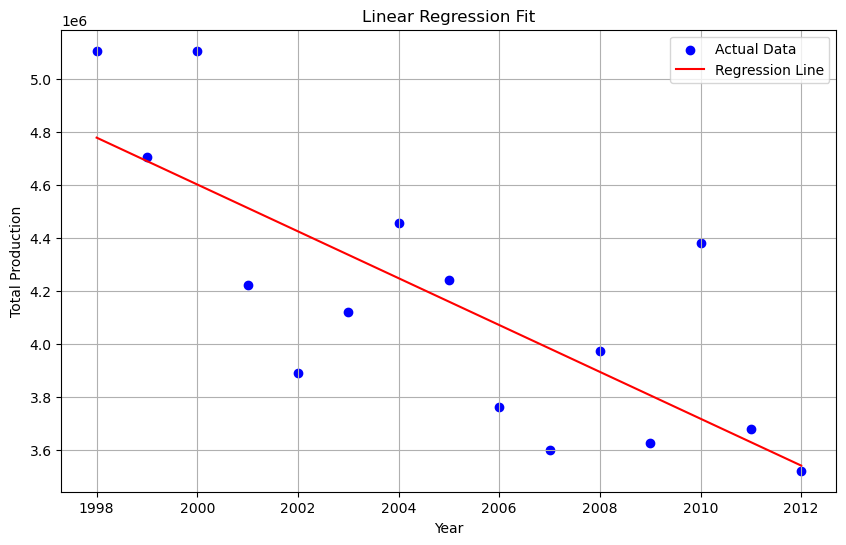

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Actual Data', color='blue')
plt.plot(X, y_predict, label='Regression Line', color='red')
plt.title('Linear Regression Fit')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.grid()
plt.legend()
plt.show()

- Future Predictions

In [13]:
X_future = np.array(range(2013, 2051)).reshape(-1, 1)
future_predict = model.predict(X_future)
#print(future_predict)
print(f"\nThe Y results for future predictions in the next years ares:{future_predict}")


The Y results for future predictions in the next years ares:[3453763.34358495 3365460.15443256 3277156.96528018 3188853.77612782
 3100550.58697543 3012247.39782304 2923944.20867065 2835641.01951829
 2747337.8303659  2659034.64121351 2570731.45206112 2482428.26290876
 2394125.07375637 2305821.88460398 2217518.69545159 2129215.50629923
 2040912.31714684 1952609.12799445 1864305.93884209 1776002.7496897
 1687699.56053731 1599396.37138492 1511093.18223256 1422789.99308017
 1334486.80392778 1246183.61477539 1157880.42562303 1069577.23647064
  981274.04731825  892970.85816586  804667.6690135   716364.47986111
  628061.29070872  539758.10155633  451454.91240397  363151.72325158
  274848.53409919  186545.34494683]


- Plot Future Predictions

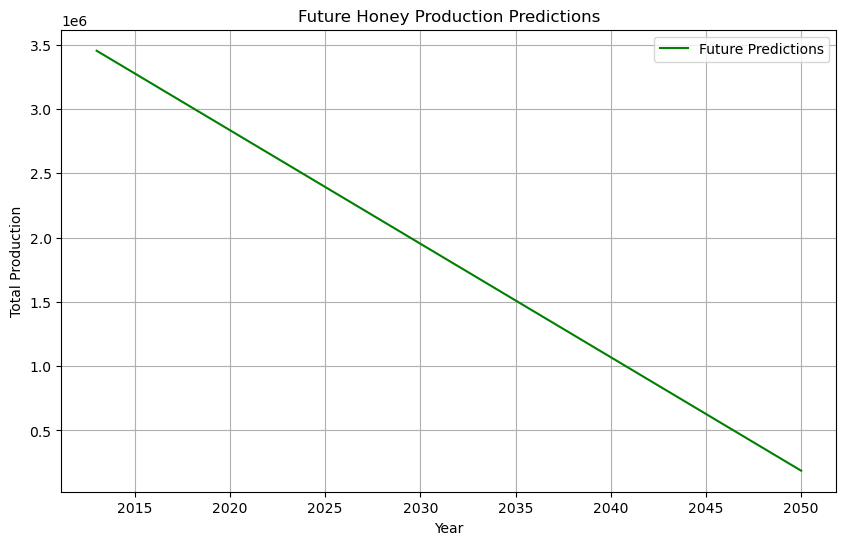

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(X_future, future_predict, label='Future Predictions', color='green')
plt.title('Future Honey Production Predictions')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.grid()
plt.legend()
plt.show()

- Predict Production for 2050

In [15]:
honey_2050 = future_predict[-1]
print(f"Predicted Honey Production in 2050: {honey_2050}")

Predicted Honey Production in 2050: 186545.34494683146


 - Model Evaluation

In [16]:
mse = mean_squared_error(y, y_predict)
r2 = r2_score(y, y_predict)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Value: {r2}")

Mean Squared Error: 103446578459.39421
R-squared Value: 0.5845502894391804


- Distribution Analysis of Total Production

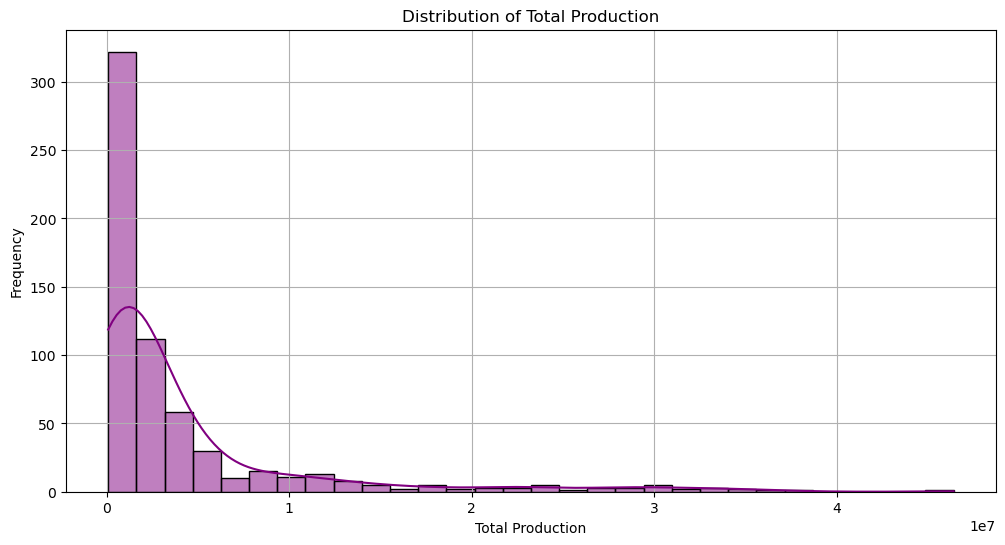

In [17]:
plt.figure(figsize=(12, 6))
sns.histplot(df['totalprod'], kde=True, color='purple', bins=30)
plt.title('Distribution of Total Production')
plt.xlabel('Total Production')
plt.ylabel('Frequency')
plt.grid()
plt.show()

---

### Insights
- Production Trends: Honey production has shown fluctuations over the years, with a noticeable declining trend in recent years.
- Model Fit: The linear regression model effectively captures the trend, with an R-squared value indicating its explanatory power.
- Future Predictions: If current trends continue, honey production is expected to decline significantly by 2050.
- Distribution Analysis: The total production distribution suggests variability in honey production across regions and years.
- Production Efficiency: States like North Dakota have higher production efficiency (production per colony) compared to others.
- Year-on-Year Changes: Significant production dips occurred in certain years, likely due to environmental factors or policy changes.
- Correlations: A strong positive correlation exists between the number of colonies and total production, but production per colony shows varying efficiency.
- Regional Trends: Some states exhibit consistent production trends, while others show significant variability.

### Conclusion
This analysis highlights the potential challenges faced by the honey production industry. Declining trends could result from environmental factors, agricultural practices, or economic pressures. Future efforts should focus on identifying and mitigating factors contributing to this decline to support sustainable honey production.

## Final Conclusions and Recommendations

**Conclusions**

- Declining Trend: Honey production shows a noticeable decline over the years, with the model predicting significantly reduced production by 2050. This trend raises concerns for the beekeeping industry and its broader impact on agriculture and biodiversity, given the critical role of bees as pollinators.

- Efficiency Matters: States with higher production efficiency (production per colony) set an example for improving beekeeping practices. Learning from these regions could help others optimize their production methods.

- Regional Variability: Substantial differences in production trends across states suggest that environmental, economic, and policy factors play significant roles. Tailored interventions may be required for different regions.

- Year-on-Year Fluctuations: Certain years experienced significant production changes, possibly linked to extreme weather events, diseases like Colony Collapse Disorder (CCD), or agricultural practices.

- Correlations Highlight Dependencies: A strong correlation between the number of colonies and total production emphasizes the importance of maintaining healthy bee populations. However, variations in efficiency suggest opportunities for better resource utilization.

**Key Recommendations**


- Promote Sustainable Beekeeping Practices: Encourage research and training programs for beekeepers to adopt methods that improve colony health and maximize production efficiency.

- Address Environmental Stressors: Policymakers should focus on mitigating environmental factors affecting honey production, such as pesticide use, habitat loss, and climate change.

- Encourage Regional Best Practices: Analyze and replicate successful strategies from high-efficiency states, such as North Dakota, to improve production in underperforming areas.

- Invest in Data-Driven Insights: Continue collecting and analyzing detailed data to monitor production trends, evaluate interventions, and adapt strategies dynamically.

- Raise Public Awareness: Promote the importance of bees not only for honey production but also for pollination, ecosystem health, and food security.

### Final Thought

The decline in honey production is not just an agricultural issue but a reflection of broader environmental and ecological challenges. By prioritizing sustainable practices, fostering innovation, and addressing critical threats, we can safeguard both the beekeeping industry and the essential ecological services it supports. The future of honey production—and, by extension, global agriculture—depends on proactive, coordinated action among stakeholders.